<Figure size 640x480 with 0 Axes>

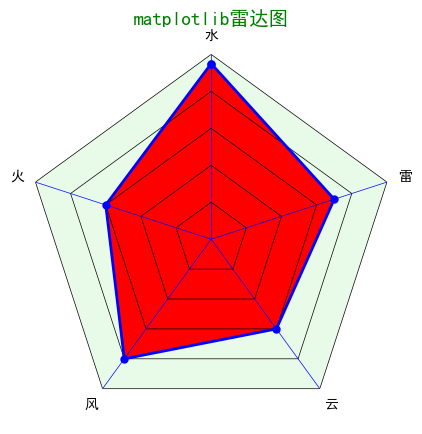

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 雷达图
def plot_radar(labels, data, score):
    n = len(labels)
    # 转化为十分制！！！
    if score in [5, 10, 100]:
        data = data * 10 / score
    elif score == 1:
        data = data * 10  
    angles = np.linspace(0, 2*np.pi, n, endpoint=False) 
    data = np.concatenate((data, [data[0]])) # 闭合
    angles = np.concatenate((angles, [angles[0]])) # 闭合
    
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)# 参数polar，表示极坐标！！
    # 画grid线（5条环形线）
    for i in [2,4,6,8,10]:
        ax.plot(angles, [i]*(n+1), 'k-',lw=0.5,) # 之所以 n +1，是因为要闭合！
    
     # 填充底色
    ax.fill(angles, [10]*(n+1), facecolor='lightgreen', alpha=0.2)
    # 自己画grid线（n条半径线）
    for i in range(n):
        ax.plot([angles[i], angles[i]], [0, 10], 'b-',lw=0.5)
        
    # 画线(数据)!
    ax.set_theta_zero_location( "N")#从正上方开始(对称比较美@_@）
    #ax.set_theta_zero_location(self, loc, offset=0.0), loc May be one of "N", "NW", "W", "SW", "S", "SE", "E", or "NE".
    ax.plot(angles, data, 'b-', linewidth=2,marker = "o", markersize =5)
    # 填充
    ax.fill(angles, data, facecolor='r', alpha=1.0)

    grid_angles = [ i* 360.0/n for i in range(n)]
    ax.set_thetagrids(grid_angles, labels, fontproperties="SimHei") #grid_angles是角度制！！
    ax.set_title("matplotlib雷达图", va='bottom', fontproperties="SimHei", fontsize =14,color="g")
    
    ax.set_rlim(0,10)
    # 下两行去掉所有默认的grid线
    ax.spines['polar'].set_visible(False) # 去掉最外围的黑圈
    ax.grid(False)                        # 去掉中间的黑圈

    ax.set_yticks([])# 关闭径向数值刻度
    plt.savefig('../figure/雷达图.png', dpi=400)
    plt.show()
    
if __name__ == '__main__':
    labels = np.array(['水','火','风','云','雷']) #标签
    data = np.array([95, 60, 80, 60, 70]) # 数据
    score = 100 # 其可选的选项有1分制、5分制、10分制、100分制
    # 画雷达图
    plot_radar(labels, data, score)